In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [3]:
# Load cleaned dataset 

df = pd.read_csv(r'C:\Users\user\2025-Y2-S1-MLB-B6G1-05-PGNO-105\notebooks\heart_disease_risk_IT24101185(1)_cleaned.csv')

# Quick peek
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (70000, 19)


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [4]:
# Basic dataset info 

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary statistics ---")
print(df.describe())

print("\n--- Missing values check ---")
print(df.isnull().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress

In [6]:
#No missing values were found. Therefore, the cleaned dataset is identical to the original.

# Prepare features and target 
X = df.drop("Heart_Risk", axis=1)  # features
y = df["Heart_Risk"]               # target

# Standardize features (important for PCA) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with all components 
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

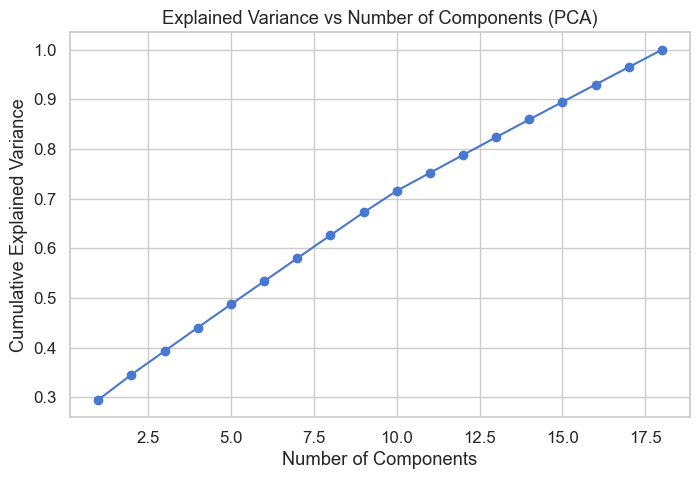

In [7]:
# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components (PCA)")
plt.grid(True)
plt.show()

In [8]:
# Reduce dimensions keeping 95% variance 
pca95 = PCA(n_components=0.95)   # keep 95% variance
X_pca95 = pca95.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape (95% variance):", X_pca95.shape)


Original shape: (70000, 18)
Reduced shape (95% variance): (70000, 17)
